<a href="https://colab.research.google.com/github/IndudiniThennakoon/SE4050-DL/blob/labsheet7/lab_7_AE_Vanilla_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


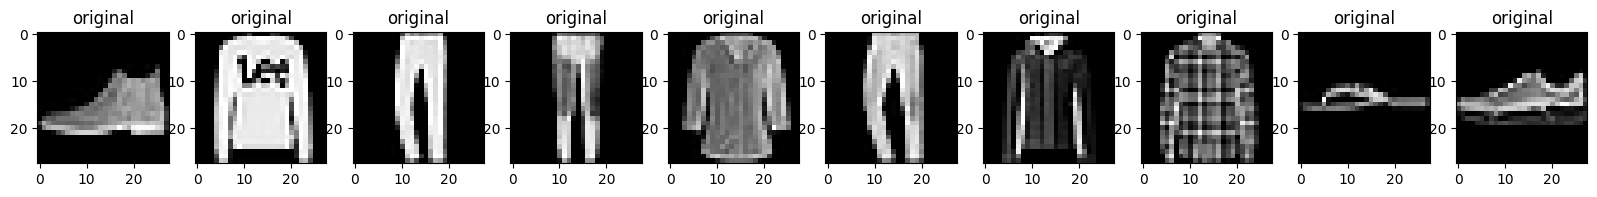

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [6]:
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
autoencoder = Vanilla_CNN()

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - loss: 0.0285 - val_loss: 0.0054
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 39ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 33ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 12

In [10]:
# autoencoder.fit(x_train, x_train,
#                 epochs=10,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - loss: 0.0312 - val_loss: 0.0062
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - loss: 0.0022 - val_loss: 0.0022


In [10]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

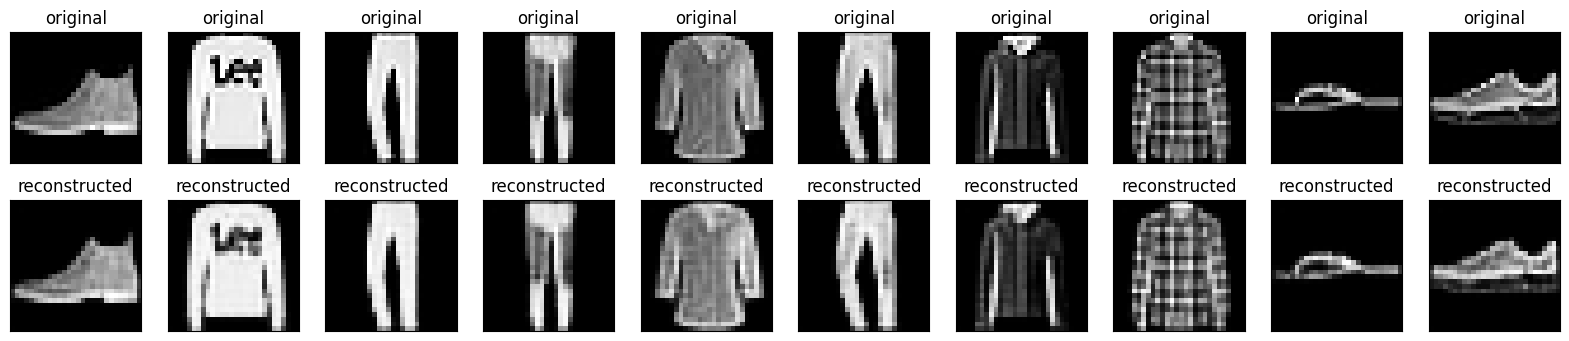

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculate Mean Squared Error (MSE)

In [14]:
decoded_imgs = autoencoder.predict(x_test)

mse = np.mean(np.square(x_test - decoded_imgs))
print(f"Test MSE: {mse}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test MSE: 0.0017702369950711727


In [ ]:
# Plotting the training and validation loss

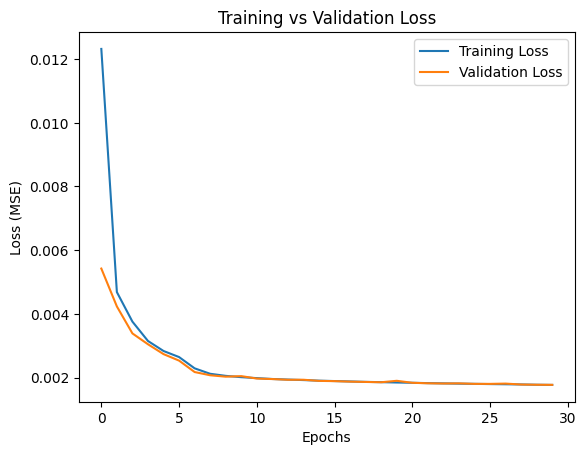

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()